# 보스턴주 부동산 가격 예측

MEDV 주택가격(목표 변수)  
CRIM 범죄율  
ZN 주거지 비율  
INDUS 비소매업 비율  
CHAS 강 조망 여부(1-조망,0-비조망)  
NOX 산화질소 농도  
RM 주거당 평균 객실 수  
AGE 노후 건물 비율  
DIS 중심지(노동센터) 접근 거리  
RAD 고속도로 접근 편이성 지수  
TAX 재산세율  
PTRATIO 학생당 교사 비율  
B 흑인 인구 비율  
LSTAT 저소득층 비율  

다음과 같은 설명 변수 중에서 의미 있는 변수를 채택하여 가격을 예측하는 모델을 만드는 것이 목적이다.    

I am trying to train a cost prediction model with my insights I got from analyzing each variable. 

In [89]:
# 데이터 구성
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split

# 회귀 분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 데이터 표준화
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale, minmax_scale, robust_scale

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('Data/BOSTON_HOUSING.csv', engine = 'python')

In [3]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


Raw 데이터를 확인합니다.

# 탐색적 분석

In [4]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [5]:
# 결측치 판별 - 없음
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/piai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/piai/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5ac8bb790>,
      dtype=object)

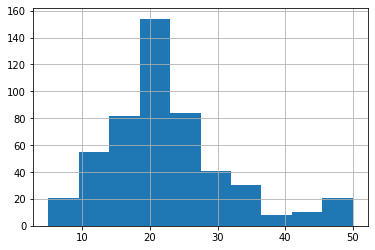

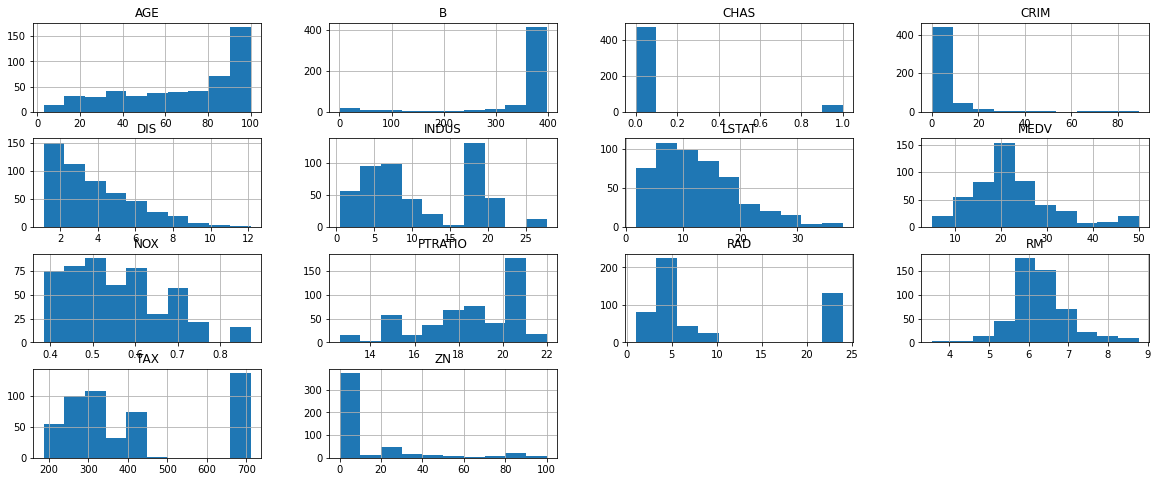

In [6]:
# 변수 별 히스토그램  
df_raw['MEDV'].hist()
df_raw.hist(figsize=(20,8))


MEDV	주택가격(목표 변수)  
CRIM	범죄율  
ZN      주거지 비율  
INDUS	비소매업 비율  
CHAS	강 조망 여부(1-조망,0-비조망)  
NOX	    산화질소 농도  
RM	    주거당 평균 객실 수  
AGE	    노후 건물 비율  
DIS	    중심지(노동센터) 접근 거리  
RAD	    고속도로 접근 편이성 지수  
TAX	    재산세율  
PTRATIO	학생당 교사 비율  
B	    흑인 인구 비율  
LSTAT	저소득층 비율  

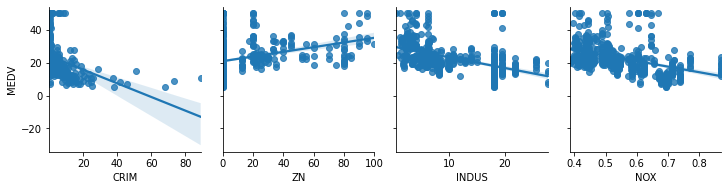

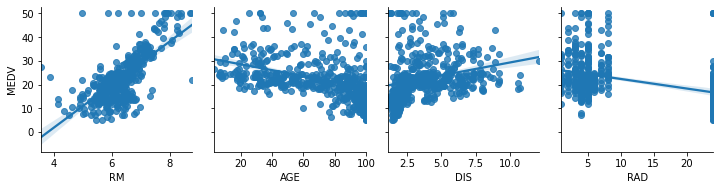

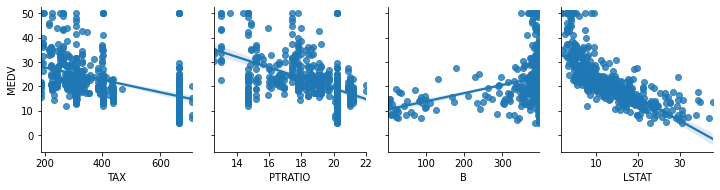

In [9]:
# 독립변수와 종속변수의 관계 파악
# 산점도 행렬 확인

sns.pairplot(df_raw,y_vars="MEDV",x_vars=['CRIM', 'ZN', 'INDUS','NOX'], kind = 'reg')

sns.pairplot(df_raw,y_vars="MEDV",x_vars=['RM', 'AGE', 'DIS','RAD'], kind = 'reg')

sns.pairplot(df_raw,y_vars="MEDV",x_vars=['TAX', 'PTRATIO','B','LSTAT'], kind = 'reg')

직관적으로 보면 목표 변수와 선형 관계가 확실히 보이는 변수와 독립의 관계를 보이는 변수가 있습니다. 
RM과 LSTAT은 한 눈에 봐도 선형 관계를 보이기 때문에 변수 채택을 고려해 보도록 하겠습니다.

좀 더 자세한 탐색적 분석을 위해 Box-plot도 보면서 판단하도록 할게요.

# 데이터 전처리

In [10]:
# 표준점수 기반 예제 코드
# 출처 : https://wikidocs.net/16582

def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])): 
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))].fillna(0)

일단 눈에 확실히 보이는 이상치를 제거해 주도록 하겠습니다.

In [11]:
std_based_outlier(df_raw)
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


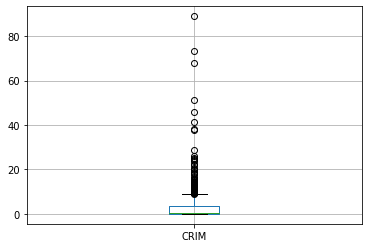

In [12]:
# 이상치 판별을 위해 Box plot 그려보기
df_raw.boxplot(column = 'CRIM')

5 이후로 아주 많은 이상치가 관측되네요. 이 모든 값을 다 버리게 된다면 데이터의 손실이 커지므로, 범주형으로 만드는 방법을 취하겠습니다.

In [13]:
df_raw['CRIM(C)'] = 0

In [14]:
df_raw.loc[(0<=df_raw['CRIM']) & (df_raw['CRIM']<=2.5),'CRIM(C)'] = 1
df_raw.loc[(2.5<df_raw['CRIM']),'CRIM(C)'] = 2

In [15]:
pd.value_counts(df_raw['CRIM(C)'].values)

1    368
2    138
dtype: int64

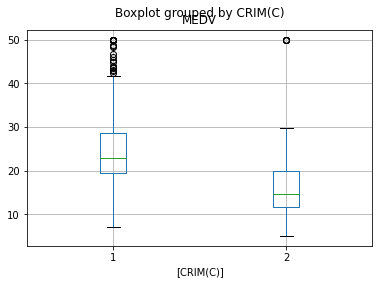

In [16]:
df_raw.boxplot(column = 'MEDV', by = ['CRIM(C)'])

범죄율 구간 (A~E)에 따른 가격 평균이 비슷하군요! 따라서 범죄율 변수를 후보에서 채택하지 않는 것을 고려해 봅니다.

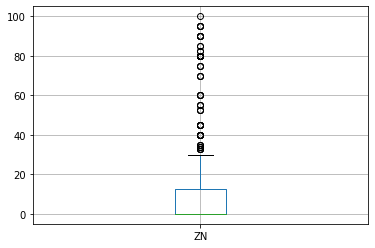

In [8]:
df_raw.boxplot(column = 'ZN')

마찬가지로, 30 이후로 아주 많은 이상치가 관측되네요. 이 모든 값을 다 버리게 된다면 데이터의 손실이 커지므로, 범주형으로 만드는 방법을 취하겠습니다.
변수 구간화를 통한 이상치 완화에 대한 근거는 https://m.blog.naver.com/gksshdk8003/221517070898 을 참고하였습니다.

In [17]:
df_raw['ZN(C)'] = 0

In [18]:
df_raw.loc[(0<=df_raw['ZN']) & (df_raw['ZN']<=20),'ZN(C)'] = 1
df_raw.loc[(20<=df_raw['ZN']) & (df_raw['ZN']<=40),'ZN(C)'] = 2
df_raw.loc[(40<=df_raw['ZN']) & (df_raw['ZN']<=60),'ZN(C)'] = 3
df_raw.loc[(60<=df_raw['ZN']) & (df_raw['ZN']<=80),'ZN(C)'] = 4
df_raw.loc[(80<=df_raw['ZN']) & (df_raw['ZN']<=100),'ZN(C)'] = 5

In [19]:
df_raw[['ZN(C)']]
pd.value_counts(df_raw['ZN(C)'].values)

1    384
2     64
5     29
3     19
4     10
dtype: int64

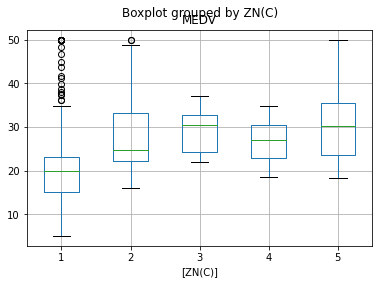

In [20]:
df_raw.boxplot(column = 'MEDV', by = ['ZN(C)'])

ZN(C) 같은 경우는 탐색적 분석을 통해 변수 선택 여부를 결정하기 아주 어려웠습니다.  주거지 비율 구간 (A~E)에 따른 가격 평균이 전체적으로는 비슷하지만 A 구간의 변수들은 영향을 미친다고 볼 수 있습니다.  그리고 비닝한 ZN 변수 포인트 수를 고려해 볼 때 A는 384개로 대부분의 비율을 차지합니다.  앞서 산점도 그래프 분석과 종합하여 ZN을 후보에서 채택하는 것을 고려해 봅니다.

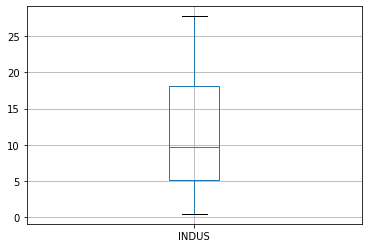

In [21]:
df_raw.boxplot(column = 'INDUS')

In [22]:
df_raw['INDUS(C)'] = 0

In [23]:
df_raw.loc[(0<=df_raw['INDUS']) & (df_raw['INDUS']<=15),'INDUS(C)'] = 1
df_raw.loc[(15<=df_raw['INDUS']),'INDUS(C)'] = 2

In [24]:
pd.value_counts(df_raw['INDUS(C)'])

1    314
2    192
Name: INDUS(C), dtype: int64

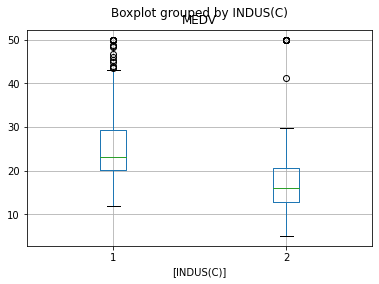

In [25]:
df_raw.boxplot(column = 'MEDV', by = ['INDUS(C)'])

육안으로 봐도 금액 평균에 있어서 차이가 있음을 확인할 수 있어요!  산점도 그래프 분석에서도 비소매업 비율과 목표 변수와의 선형적 관계를 파악할 수 있었기 때문에 위 변수를 채택하는 것을 고려해 봅니다.

In [26]:
pd.value_counts(df_raw['CHAS'])

0    471
1     35
Name: CHAS, dtype: int64

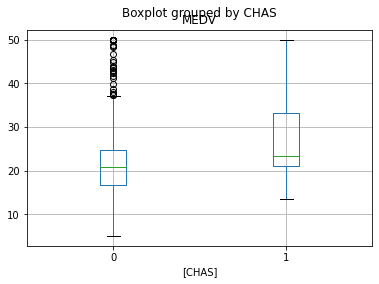

In [27]:
df_raw.boxplot(column = 'MEDV', by = ['CHAS'])

조망권이 있는 경우와 없는 경우에 평균이 비슷하군요
따라서 조망권 변수를 후보에서 채택하지 않는 것을 고려해 봅니다.
일반적으로 강이 보이면 집값이 비싸지는 한국 정서와 약간 다른 미국 스타일이 느껴졌습니다.

In [ ]:
df_raw['INDUS(C)'] = 0

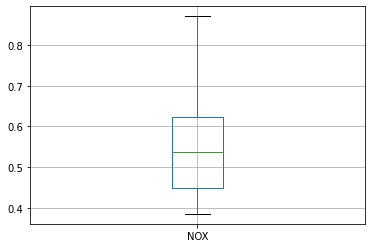

In [28]:
df_raw.boxplot(column = 'NOX')

In [29]:
df_raw.loc[(0<=df_raw['NOX']) & (df_raw['NOX']<0.5),'NOX(C)'] = 1
df_raw.loc[0.5<=df_raw['NOX'],'NOX(C)'] = 2

In [30]:
pd.value_counts(df_raw['NOX(C)'])

2.0    314
1.0    192
Name: NOX(C), dtype: int64

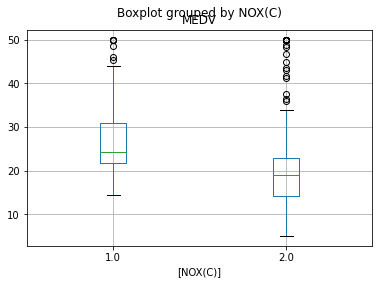

In [31]:
df_raw.boxplot(column = 'MEDV', by = ['NOX(C)'])

산화 질소 농도에 따른 평균의 차이가 관측되는군요.  
공기가 안 좋으면 당연히 집값이 낮아질 것이라는 상식과 일치합니다.  
산점도 분석에서도 비교적 선형관계를 확인할 수 있었습니다.  
따라서 이 변수를 후보에 채택하는 것을 고려해 봅니다.

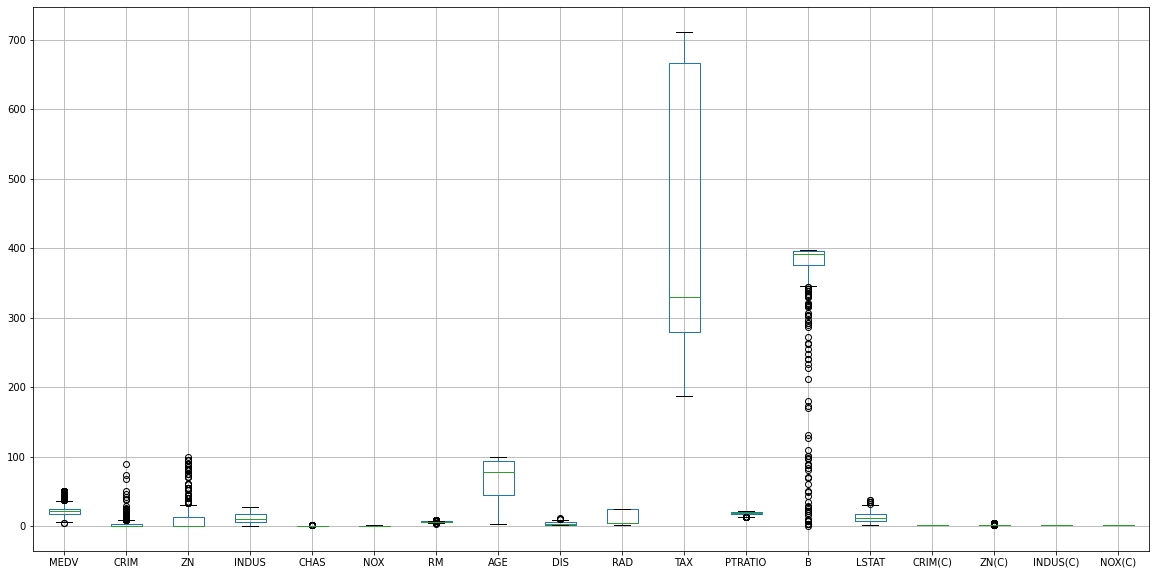

In [32]:
df_raw.boxplot(figsize = (20, 10))

흑인 인구 비율(B) 같은 경우도 평균과 동떨어져 너무 고르게 분포되어 있기 때문에 구간화를 통한 이상치 완화를 시도해봅니다.

In [33]:
df_raw['B(C)'] = 0

In [34]:
df_raw.loc[(300<=df_raw['B']) & (df_raw['B']<=320),'B(C)'] = 1
df_raw.loc[(320<=df_raw['B']) & (df_raw['B']<=340),'B(C)'] = 2
df_raw.loc[(340<=df_raw['B']) & (df_raw['B']<=360),'B(C)'] = 3
df_raw.loc[(360<=df_raw['B']) & (df_raw['B']<=380),'B(C)'] = 4
df_raw.loc[(380<=df_raw['B']) & (df_raw['B']<=400),'B(C)'] = 5

In [35]:
df_raw[['B(C)']]
pd.value_counts(df_raw['B(C)'].values)

5    350
4     60
0     54
3     23
1     10
2      9
dtype: int64

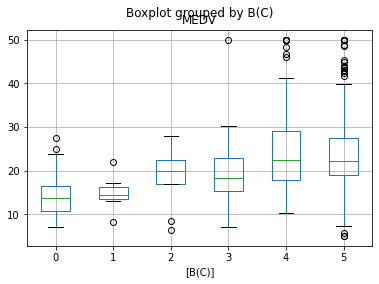

In [36]:
df_raw.boxplot(column = 'MEDV', by = ['B(C)'])

흑인 인구 비율 (1 ~ 5)에 따른 가격 평균이 비슷하군요!  
1 구간 (300~320)은 제법 영향을 끼쳐 보이지만, 이 구간에 속하는 갯수가 9개로 아주 적습니다.  
따라서 이 변수를 후보에서 채택하지 않는 것을 고려해 봅니다.

In [37]:
df_raw['RM(C)'] = 0

In [38]:
# 평균 객실수(RM)를 중심으로 구간 나누기
df_raw.loc[6<=df_raw['RM'],'RM(C)'] = 1
df_raw.loc[df_raw['RM']<6,'RM(C)'] = 2

In [39]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM(C),ZN(C),INDUS(C),NOX(C),B(C),RM(C)
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,1,1,1,2.0,5,1
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,1,1,1,1.0,5,1
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,1,1,1,1.0,5,1
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,1,1,1,1.0,5,1
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,1,1,1,1.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,1,1,1,2.0,5,1
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,1,1,1,2.0,5,1
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,1,1,1,2.0,5,1
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,1,1,1,2.0,5,1


In [40]:
df_raw[['RM(C)']]
pd.value_counts(df_raw['RM(C)'].values)

1    333
2    173
dtype: int64

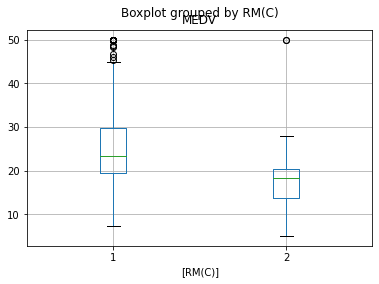

In [41]:
df_raw.boxplot(column = 'MEDV', by = ['RM(C)'])

주거당 평균 객실수 구간에 따른 가격 변동이 보이기 때문에 이 변수를 후보에서 채택하는 것을 고려해 봅니다.

In [42]:
df_raw['AGE(C)'] = 0

In [43]:
# 평균 노후 건물 비율(AGE)를 중심으로 구간 나누기
df_raw.loc[68<=df_raw['AGE'],'AGE(C)'] = 1
df_raw.loc[df_raw['AGE']<68,'AGE(C)'] = 2

In [44]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,PTRATIO,B,LSTAT,CRIM(C),ZN(C),INDUS(C),NOX(C),B(C),RM(C),AGE(C)
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,15.300000,396.899994,4.98,1,1,1,2.0,5,1,2
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,17.799999,396.899994,9.14,1,1,1,1.0,5,1,1
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,17.799999,392.829987,4.03,1,1,1,1.0,5,1,2
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,18.700001,394.630005,2.94,1,1,1,1.0,5,1,2
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,18.700001,396.899994,5.33,1,1,1,1.0,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,21.000000,391.989990,9.67,1,1,1,2.0,5,1,1
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,21.000000,396.899994,9.08,1,1,1,2.0,5,1,1
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,21.000000,396.899994,5.64,1,1,1,2.0,5,1,1
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,21.000000,393.450012,6.48,1,1,1,2.0,5,1,1


In [45]:
df_raw[['AGE(C)']]
pd.value_counts(df_raw['AGE(C)'].values)

1    295
2    211
dtype: int64

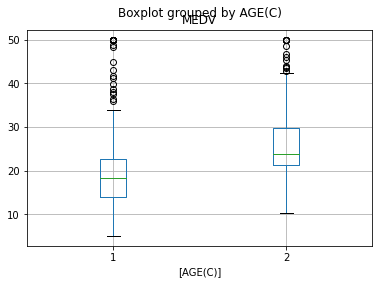

In [46]:
df_raw.boxplot(column = 'MEDV', by = ['AGE(C)'])

마찬가지로, 주거당 평균 평균 노후 건물 비율에 따른 가격 변동이 보이기 때문에 이 변수를 후보에서 채택하는 것을 고려해 봅니다.
예상과는 달리 노후 건물 비율이 커짐에 따라 대체로 집값이 증가하는 현상을 보였습니다.

In [47]:
df_raw['DIS(C)'] = 0

In [48]:
# 중심지 접근 거리(DIS)를 중심으로 구간 나누기
df_raw.loc[3.5<=df_raw['DIS'],'DIS(C)'] = 1
df_raw.loc[df_raw['DIS']<3.5,'DIS(C)'] = 2

In [49]:
df_raw[['DIS(C)']]
pd.value_counts(df_raw['DIS(C)'].values)

2    278
1    228
dtype: int64

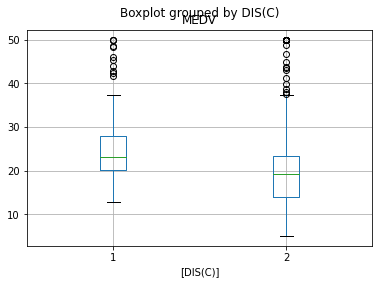

In [50]:
df_raw.boxplot(column = 'MEDV', by = ['DIS(C)'])

중심지 접근거리에 따른 가격 평균이 대체로 비슷하군요! 하지만 산점도 그래프 분석에서 선형 관계를 확인할 수 있었기 때문에 이 변수를 후보에서 채택하는 것을 고려해 봅니다.

In [51]:
df_raw['RAD(C)'] = 0

In [52]:
# 고속도로 접근 편이성 지수(RAD)를 중심으로 구간 나누기
df_raw.loc[0<=df_raw['RAD'],'RAD(C)'] = 1
df_raw.loc[df_raw['RAD']<10,'RAD(C)'] = 2

In [ ]:
df_raw.loc[(0<=df_raw['ZN']) & (df_raw['ZN']<=20),'ZN(C)'] = 1
df_raw.loc[(20<=df_raw['ZN']) & (df_raw['ZN']<=40),'ZN(C)'] = 2
df_raw.loc[(40<=df_raw['ZN']) & (df_raw['ZN']<=60),'ZN(C)'] = 3
df_raw.loc[(60<=df_raw['ZN']) & (df_raw['ZN']<=80),'ZN(C)'] = 4
df_raw.loc[(80<=df_raw['ZN']) & (df_raw['ZN']<=100),'ZN(C)'] = 5

In [53]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,LSTAT,CRIM(C),ZN(C),INDUS(C),NOX(C),B(C),RM(C),AGE(C),DIS(C),RAD(C)
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,4.98,1,1,1,2.0,5,1,2,1,2
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,9.14,1,1,1,1.0,5,1,1,1,2
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,4.03,1,1,1,1.0,5,1,2,1,2
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,2.94,1,1,1,1.0,5,1,2,1,2
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,5.33,1,1,1,1.0,5,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,9.67,1,1,1,2.0,5,1,1,2,2
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,9.08,1,1,1,2.0,5,1,1,2,2
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,5.64,1,1,1,2.0,5,1,1,2,2
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,6.48,1,1,1,2.0,5,1,1,2,2


In [54]:
df_raw[['RAD(C)']]
pd.value_counts(df_raw['RAD(C)'].values)

2    374
1    132
dtype: int64

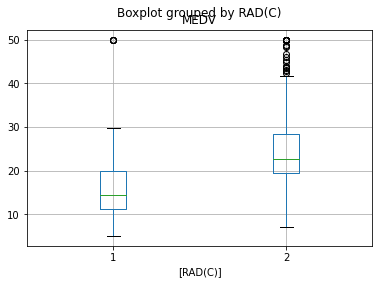

In [56]:
df_raw.boxplot(column = 'MEDV', by = ['RAD(C)'])

예상했던 대로 고속도로와 접근이 편리하면 가격이 올라가는 경향이 있는 것을 확인할 수 있습니다. 특히 땅이 넓은 미국에서는 교통의 편의성이 아주 중요합니다. 따라서 고속도로 접근 편이성 지수 변수를 후보로 채택하는 것을 고려해 봅니다.

In [57]:
df_raw['TAX(C)'] = 0
# 세금(TAX)을 중심으로 구간 나누기
df_raw.loc[(0<=df_raw['TAX']) & (df_raw['TAX']<=408),'TAX(C)'] = 1
df_raw.loc[(408<df_raw['TAX']),'TAX(C)'] = 2

In [58]:
pd.value_counts(df_raw['TAX(C)'].values)

1    338
2    168
dtype: int64

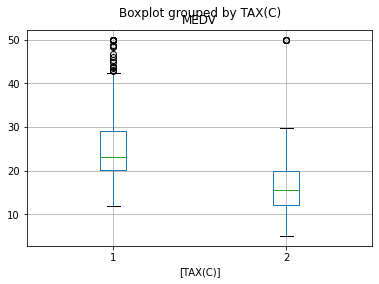

In [59]:
df_raw.boxplot(column = 'MEDV', by = ['TAX(C)'])

예상했던 대로 재산세율이 증가하면 가격이 내려가는 경향이 있는 것을 확인할 수 있습니다. 따라서 이 변수를 후보로 채택하는 것을 고려해 봅니다.

In [60]:
df_raw['PTRATIO(C)'] = 0
# 학생당 교사 비율(RAD)를 중심으로 구간 나누기
df_raw.loc[(0<=df_raw['PTRATIO']) & (df_raw['PTRATIO']<=18),'PTRATIO(C)'] = 1
df_raw.loc[(18<df_raw['PTRATIO']),'PTRATIO(C)'] = 2

In [61]:
pd.value_counts(df_raw['PTRATIO(C)'].values)

2    316
1    190
dtype: int64

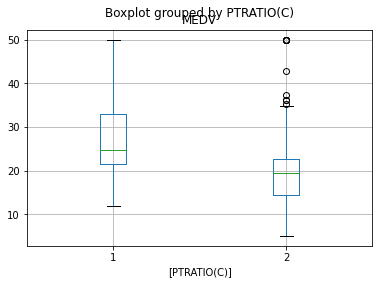

In [62]:
df_raw.boxplot(column = 'MEDV', by = ['PTRATIO(C)'])

학생당 교사 비율이 증가하면 집 가격이 내려가는 경향이 있는 것을 확인할 수 있습니다.  
이 값이 평균 0.18을 나타냈으므로 한 학교에 평균 교사 18명, 학생 100명이 있다고 볼 수 있습니다.  
이를 고려해 볼 때 PTRATIO 수치가 늘어나면 한 학생이 학교에서 만나게 되는 교사 수가 많아진다는 뜻이고, 이 현상의 원인 중의 하나로 주변 학교들의 폐교를 들 수 있겠습니다. 이 때문에 주변 학교에서 근무하던 교사가 인근 학교로 몰리면서 이 현상이 발생한 것으로 추측됩니다. 이 변수를 후보로 채택하는 것을 고려해 봅니다.

In [63]:
df_raw['LSTAT(C)'] = 0
# 저소득층 비율(LSTAT)을 중심으로 구간 나누기
df_raw.loc[(0<=df_raw['LSTAT']) & (df_raw['LSTAT']<=13),'LSTAT(C)'] = 1
df_raw.loc[(13<df_raw['LSTAT']),'LSTAT(C)'] = 2

In [64]:
pd.value_counts(df_raw['LSTAT(C)'].values)

1    294
2    212
dtype: int64

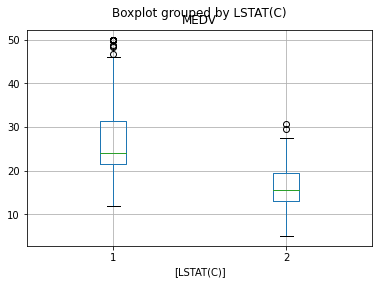

In [65]:
df_raw.boxplot(column = 'MEDV', by = ['LSTAT(C)'])

예상했던 대로 저소득층 비율이 높으면 집값이 낮아지는 것을 확인할 수 있었습니다. 산점도 그래프 분석으로부터 선형관계가 확실하다는 것을 파악했으므로 이 변수를 후보로 채택하는 것을 고려해 봅니다.

In [66]:
# 변수 선택
df_raw.drop(['CRIM','CHAS','B','INDUS(C)','NOX(C)','B(C)','RM(C)','AGE(C)','DIS(C)',
             'RAD(C)','TAX(C)','PTRATIO(C)','LSTAT(C)','CRIM(C)','ZN(C)'], axis = 1, inplace = True)

In [67]:
df_raw

,MEDV,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,24.000000,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98
1,21.600000,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14
2,34.700001,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03
3,33.400002,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94
4,36.200001,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.0,11.93,0.573,6.593,69.099998,2.4786,1,273,21.000000,9.67
502,20.600000,0.0,11.93,0.573,6.120,76.699997,2.2875,1,273,21.000000,9.08
503,23.900000,0.0,11.93,0.573,6.976,91.000000,2.1675,1,273,21.000000,5.64
504,22.000000,0.0,11.93,0.573,6.794,89.300003,2.3889,1,273,21.000000,6.48


# 모델링

이제 데이터 전처리, 탐색적 분석이 끝났으니 본격적으로 모델링을 수행합니다. 

In [113]:
# 회귀 분석
import statsmodels.formula.api as smf

In [114]:
# 모델 평가를 위한 함수
def root_mean_squared_error(y_true, y_pred) :
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [115]:
models = ['linear regression', 'decision tree', 'random forest', 'gradiant boosting']
mse, rmse, mae, mape = [],[],[],[]

In [116]:
# 설명변수간 다중공선성(변수들끼리 끼치는 영향) 10 넘으면 보통 제거

#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

#VIF 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
9,PTRATIO,1.781
4,RM,1.911
1,ZN,2.281
10,LSTAT,2.766
5,AGE,3.079
6,DIS,3.901
2,INDUS,3.940
3,NOX,4.353
7,RAD,6.811
8,TAX,8.866


In [117]:
# 회귀 모델

lr_model = smf.ols(formula= 'MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT', data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          4.22e-130
Time:                        23:04:21   Log-Likelihood:                -1517.7
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     495   BIC:                             3104.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7685      5.045      8.279      0.0

# 위 모델의 최종 회귀 식  
y(MEDV) = 0.0431 * ZN + 0.0435 * INDUS -17.5918 * NOX + 3.7193 * RM + 0.0063 * AGE -1.4127 + 0.2416 * RAD -0.0142 * TAX -0.9671 * PTRATIO-0.5983 * LSTAT

설명계수는 0.715입니다.

In [118]:
# 목표 변수 데이터 지정
df_raw_y = df_raw['MEDV']

In [119]:
# 설명변수 데이터 지정
df_raw_x = df_raw.drop('MEDV', axis = 1, inplace = False)

In [120]:
# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 4321)

In [121]:
# 예측
lr_y_pred = lr_result.predict(df_test_x)

In [122]:
# 평가
mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(root_mean_squared_error(df_test_y,lr_y_pred))
mape.append(root_mean_squared_error(df_test_y,lr_y_pred))

In [123]:
# 의사결정 나무

# min_samples_leaf : 잎사귀 최소 자료 수
para_depth = [depth for depth in range (1,11)]

# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_tree * 10 for n_tree in range (1,21)]

# min_samples_split : 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range (2,20)]

estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter의 범위
param_grid = {"criterion":['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
             'max_depth':para_depth, 'min_samples_split':para_split,
             'min_samples_leaf':para_leaf}

In [92]:
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs = -1)
grid_dt.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(grid_dt.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(grid_dt.score(df_test_x, df_test_y)))

Score on training set:0.884
Score on test set:0.645


In [124]:
# 예측
dt_y_pred = grid_dt.predict(df_test_x)

In [125]:
# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(root_mean_squared_error(df_test_y,dt_y_pred))
mape.append(root_mean_squared_error(df_test_y,dt_y_pred))

In [99]:
# 랜덤 포레스트

para_leaf = [n_leaf * 1 for n_leaf in range (1,21)]
para_split = [n_split * 2 for n_split in range (2,21)]
para_depth = [depth for depth in range (1,11)]

estimator = RandomForestRegressor(random_state = 4321)

# 구하고자 하는 parameter의 범위
param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

#설명력이 높은 최적 parameter 찾기
rf_model = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs = -1)
rf_model.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_model.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_model.score(df_test_x, df_test_y)))

Score on training set:0.965
Score on test set:0.728


In [126]:
# 예측
rf_y_pred = rf_model.predict(df_test_x)

In [127]:
# 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(root_mean_squared_error(df_test_y,rf_y_pred))
mape.append(root_mean_squared_error(df_test_y,rf_y_pred))

In [103]:
# 그래디언트 부스트

para_leaf = [n_leaf * 1 for n_leaf in range (1,21)]
para_split = [n_split * 2 for n_split in range (1,21)]
para_depth = [depth for depth in range (1,11)]
para_lr = [lr*0.1 for lr in range(1,10)]

estimator = GradientBoostingRegressor(random_state = 1234)
# 구하고자 하는 parameter의 범위
param_grid = {"criterion":['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
             'learning_rate':para_lr, 'max_depth':para_depth, 'min_samples_leaf':para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_gb.gest_params_))
print('\nbest score: \n {}'.format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.30000000000000004, loss='ls',
                          max_depth=3, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


NameError: name 'rid_gb' is not defined

In [104]:
grid_gb = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.30000000000000004, loss='ls',
                          max_depth=3, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
grid_gb.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.30000000000000004, loss='ls',
                          max_depth=3, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [128]:
# 예측
gb_y_pred = grid_gb.predict(df_test_x)

In [129]:
# 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(root_mean_squared_error(df_test_y,gb_y_pred))
mape.append(root_mean_squared_error(df_test_y,gb_y_pred))

In [130]:
print(mse)
print(rmse)
print(mae)
print(mape)
print(models)

[32.50649088542034, 30.62266481300532, 23.471633691925685, 19.76044424849295]
[5.701446385385058, 5.533774915282091, 4.844753212695739, 4.445272123109332]
[5.701446385385058, 5.533774915282091, 4.844753212695739, 4.445272123109332]
[5.701446385385058, 5.533774915282091, 4.844753212695739, 4.445272123109332]
['linear regression', 'decision tree', 'random forest', 'gradiant boosting']


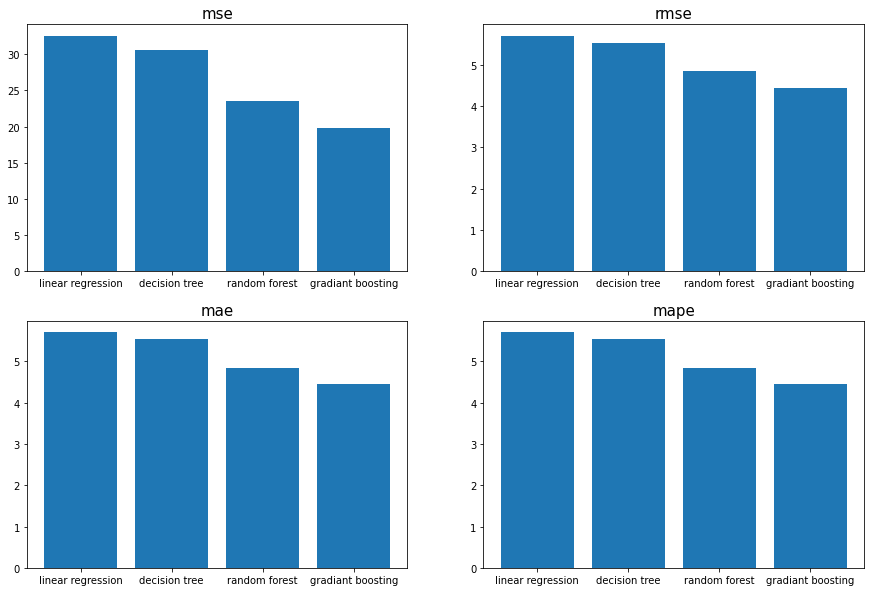

In [132]:
# 모델 최종 평가
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)


ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

# 결론

gradiant boosting의 평가 지표가 가장 좋게 나왔네요. 그런데 결국 이 모델이 가장 좋은 모델이라고 할 수 있을까요? 몇 가지 고려해야할 사항이 있을 것 같네요.

***1. 데이터가 수집된 시간*** : 아주 오래된 데이터라면 현재의 트렌드를 반영하기 어렵습니다.    
***2. 선택한 피쳐의 타당성*** : 분석가 입장에서 가설을 세우고 여러 방법으로 검증해 나가면서 변수를 선택하였습니다. 그 과정에서 당연히 주관적 요소 (도메인 지식, 탐색적 분석에 의한 근거)가 개입되기 마련이며 실제 현업이였다면 제가 진행한 실험을 여러번 수행하여 최적의 결과를 내는 것을 선택해야 할 것입니다. 타당성은 곧 모델의 결과와 직결됩니다.    
***3. 목표변수 (금액)의 성질*** : MEDV는 금액의 중앙값입니다. 중앙값이 아무리 특이치에 영향을 덜 받는 경향성이라고 할 지라도 그 안에 있는 모든 관측치의 특성을 100% 대표하기는 어렵습니다. 그렇기 때문에 예측한 금액은 100% 맹신할 수 없으며 투자나 집 구매를 하기 전에 참고용으로는 괜찮을 듯 합니다.  

결국 이번 프로젝트를 통해서 데이터를 해석하고 인사이트를 도출해내는 과정을 익힐 수 있어서 재미있는 경험이었습니다!!  